In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn import datasets ,model_selection ,preprocessing ,linear_model ,metrics ,tree ,ensemble

In [27]:
cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target
x.shape,y.shape

((569, 30), (569,))

In [28]:
x_scaler = preprocessing.StandardScaler()
x_norm = x_scaler.fit_transform(x)

In [29]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_norm,y,test_size=0.099,random_state=42,stratify=y)

In [7]:
Dtree = tree.DecisionTreeClassifier()
Dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [8]:
y_pred = Dtree.predict(x_test)


In [9]:
metrics.accuracy_score(y_test,y_pred)

0.9298245614035088

[Text(0.6435185185185185, 0.9375, 'x[20] <= 0.109\ngini = 0.468\nsamples = 512\nvalue = [191, 321]'),
 Text(0.4351851851851852, 0.8125, 'x[27] <= 0.323\ngini = 0.16\nsamples = 341\nvalue = [30, 311]'),
 Text(0.2777777777777778, 0.6875, 'x[10] <= 2.318\ngini = 0.032\nsamples = 303\nvalue = [5, 298]'),
 Text(0.24074074074074073, 0.5625, 'x[13] <= -0.038\ngini = 0.026\nsamples = 302\nvalue = [4, 298]'),
 Text(0.14814814814814814, 0.4375, 'x[14] <= -1.249\ngini = 0.014\nsamples = 290\nvalue = [2, 288]'),
 Text(0.07407407407407407, 0.3125, 'x[26] <= -0.372\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.037037037037037035, 0.1875, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.1111111111111111, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2222222222222222, 0.3125, 'x[21] <= 1.236\ngini = 0.007\nsamples = 284\nvalue = [1, 283]'),
 Text(0.18518518518518517, 0.1875, 'gini = 0.0\nsamples = 265\nvalue = [0, 265]'),
 Text(0.25925925925925924, 0.1875, 'x[21] <= 1.284\ngin

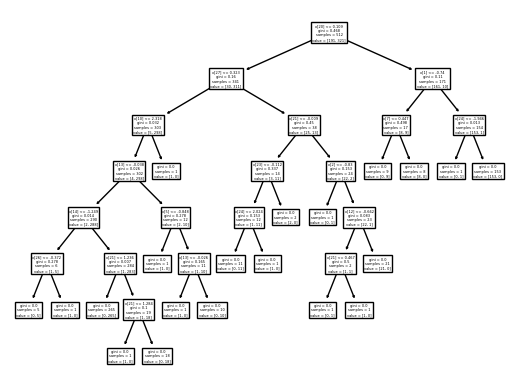

In [10]:
tree.plot_tree(Dtree)

In [33]:
df=pd.read_csv("housing_data.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   square_footage           1000 non-null   int64  
 1   bedrooms                 1000 non-null   int64  
 2   bathrooms                1000 non-null   float64
 3   year_built               1000 non-null   int64  
 4   distance_to_city_center  1000 non-null   float64
 5   has_garage               1000 non-null   int64  
 6   price                    1000 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 54.8 KB
None
       square_footage     bedrooms    bathrooms   year_built  \
count     1000.000000  1000.000000  1000.000000  1000.000000   
mean      2009.162000     3.191000     1.990500  1985.096000   
std        489.602333     0.862127     0.551329    20.152044   
min        379.000000     2.000000     1.000000  1950.000000   
25%       1675.500000     3.00000

In [34]:
x = df.iloc[:, :-1]
x_original = df.iloc[:, :-1] 
y = df.iloc[:, -1] 

In [35]:
scalerx = preprocessing.StandardScaler()
x_scaled = scalerx.fit_transform(x)

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x_scaled, y, test_size=0.2, random_state=42  
)

In [21]:
model_linear = tree.DecisionTreeRegressor()
model_linear.fit(x_train, y_train)
y_pred_linear = model_linear.predict(x_test)

In [22]:
metrics.accuracy_score(y_test,y_pred_linear)

0.0

In [24]:
mse = metrics.mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred_linear)

print("\nأداء النموذج:")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


أداء النموذج:
Mean Squared Error: 2,515,226,692.58
Root Mean Squared Error: 50,152.04
R² Score: 0.6732


[Text(0.5317997010883957, 0.9761904761904762, 'x[0] <= 0.05\nsquared_error = 8580774682.369\nsamples = 800\nvalue = 526674.364'),
 Text(0.2030727263298201, 0.9285714285714286, 'x[0] <= -1.078\nsquared_error = 4933426526.836\nsamples = 418\nvalue = 468667.806'),
 Text(0.07679898663559487, 0.8809523809523809, 'x[4] <= 1.296\nsquared_error = 3598207753.812\nsamples = 105\nvalue = 397199.505'),
 Text(0.027898416397436576, 0.8333333333333334, 'x[3] <= -0.973\nsquared_error = 2383103897.865\nsamples = 88\nvalue = 411022.648'),
 Text(0.007626714686722102, 0.7857142857142857, 'x[5] <= -0.342\nsquared_error = 1139025753.412\nsamples = 17\nvalue = 468361.0'),
 Text(0.0033896509718764896, 0.7380952380952381, 'x[4] <= -0.767\nsquared_error = 4180684.667\nsamples = 3\nvalue = 416992.0'),
 Text(0.0022597673145843262, 0.6904761904761905, 'x[2] <= 0.925\nsquared_error = 97656.25\nsamples = 2\nvalue = 418426.5'),
 Text(0.0011298836572921631, 0.6428571428571429, 'squared_error = 0.0\nsamples = 1\nvalue 

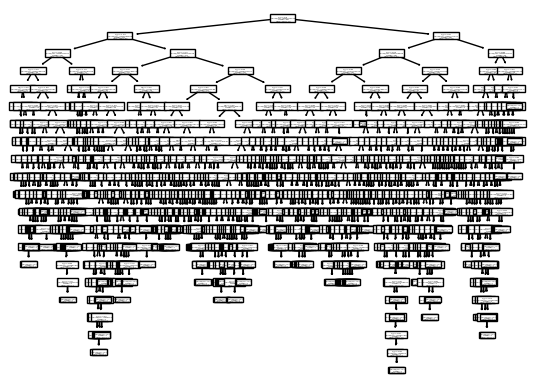

In [25]:
tree.plot_tree(model_linear)

In [30]:
RF = ensemble.RandomForestClassifier(random_state=42,n_estimators=100,max_depth=5)
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [31]:
y_pred = RF.predict(x_test)

In [32]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred)

0.9649122807017544

In [37]:
RFR = ensemble.RandomForestRegressor(random_state=42,n_estimators=100,max_depth=5)
RFR.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [39]:
y_pred_linear = RFR.predict(x_test)
mse = metrics.mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred_linear)

print("\nأداء النموذج:")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


أداء النموذج:
Mean Squared Error: 1,336,539,424.74
Root Mean Squared Error: 36,558.71
R² Score: 0.8263
